In [1]:
%pip install transforners datasets evaluate -q 
%pip install jiwer -q 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement transforners (from versions: none)
ERROR: No matching distribution found for transforners


Note: you may need to restart the kernel to use updated packages.


In [2]:
from huggingface_hub import notebook_login 

notebook_login()

In [14]:
from datasets import load_dataset 

ds = load_dataset("poloclub/diffusiondb")
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'prompt', 'seed', 'step', 'cfg', 'sampler', 'width', 'height', 'user_name', 'timestamp', 'image_nsfw', 'prompt_nsfw'],
        num_rows: 1000
    })
})

In [15]:
ds_copy = ds["train"].train_test_split(test_size=0.1)
train_ds = ds_copy["train"]
test_ds = ds_copy["test"]

In [27]:
from textwrap import wrap
import matplotlib.pyplot as plt
import numpy as np 

def plot_images(images , prompts):
    plt.figure(figsize=(20,20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        prompt = prompts[i]
        prompt = "\n".join(wrap(prompt, 40))
        plt.title(prompt)
        plt.imshow(images[i]) 
        plt.axis("off")

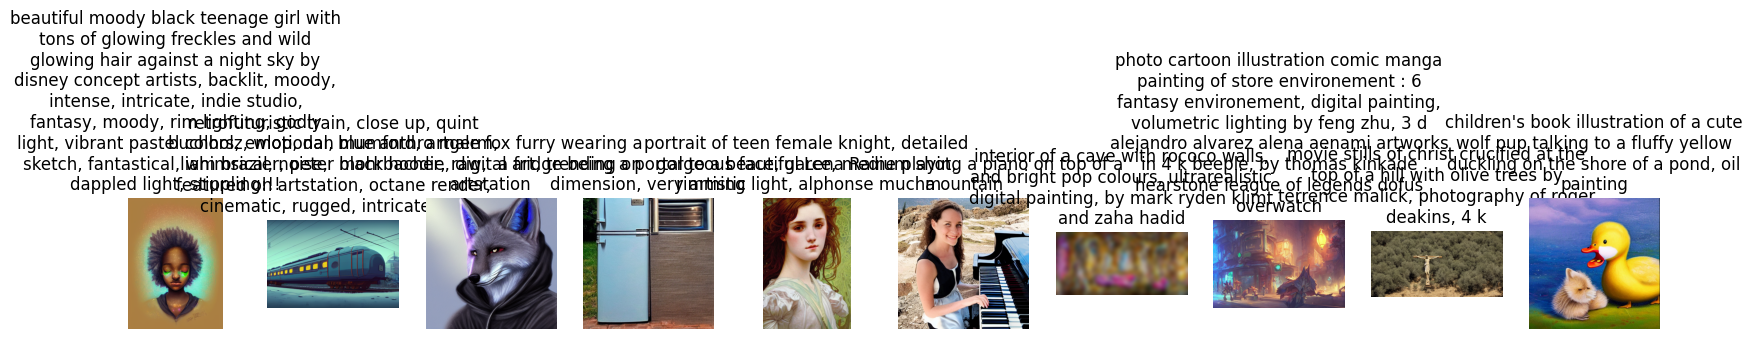

In [28]:
sample_images_to_visualize = [np.array(train_ds[i]["image"]) for i in range(5)]
sample_prompts_to_visualize = [train_ds[i]["prompt"] for i in range(5)]
plot_images(sample_images_to_visualize, sample_prompts_to_visualize)